## 6 Preparando imagens

### 6.1 Import

In [1]:
import cv2
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

### 6.2 listando imagens na pasta

In [2]:
#vamos armazenar 
img_list = []

folder = '../data/imgs/'

#lista de extensões de imagens aceitas
img_types = ["jpeg", "jpg", "png", "bmp"]


print("imagens descobertas na pasta",folder)
#para cada extensão, faremos uma busca por imagens na pasta "/data/imgs/"
for type_ in img_types:
    img_files = glob.glob(folder+'*.'+type_)
    #para cada arquivo encontrado na pasta, armazenaremos na lista
    for img_path in img_files:
        img_list.append(img_path)
        #imprimindo o nome do arquivo
        print(os.path.basename(img_path))

imagens descobertas na pasta ../data/imgs/
1.jpeg
2.jpeg
3.jpeg
4.jpg
5.jpg
6.jpg


### 6.3 Carregando os dados das imagens

In [3]:
#pasta onde
img_data_list = []

for img_path in img_list:
    img_data = cv2.imread(img_path)
    img_data_list.append(img_data)
    print("image:",os.path.basename(img_path), "altura:", img_data.shape[0], "largura:", 
          img_data.shape[1], "canais:", img_data.shape[2])
    

image: 1.jpeg altura: 168 largura: 300 canais: 3
image: 2.jpeg altura: 213 largura: 236 canais: 3
image: 3.jpeg altura: 183 largura: 276 canais: 3
image: 4.jpg altura: 378 largura: 400 canais: 3
image: 5.jpg altura: 617 largura: 823 canais: 3
image: 6.jpg altura: 375 largura: 500 canais: 3


### 6.4 Padronizando as dimensões

In [4]:
for i, img_data in enumerate(img_data_list): 
    img_data = cv2.resize(img_data, (300,300), interpolation = cv2.INTER_AREA)
    img_data_list[i] = img_data
    print("image:",os.path.basename(img_list[i]), "altura:", img_data.shape[0], "largura:", 
          img_data.shape[1], "canais:", img_data.shape[2])


image: 1.jpeg altura: 300 largura: 300 canais: 3
image: 2.jpeg altura: 300 largura: 300 canais: 3
image: 3.jpeg altura: 300 largura: 300 canais: 3
image: 4.jpg altura: 300 largura: 300 canais: 3
image: 5.jpg altura: 300 largura: 300 canais: 3
image: 6.jpg altura: 300 largura: 300 canais: 3


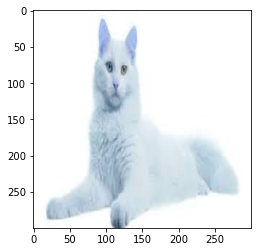

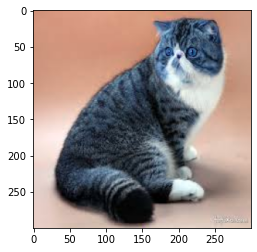

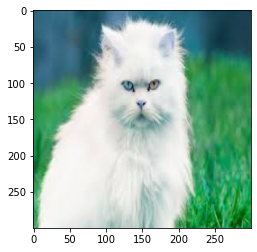

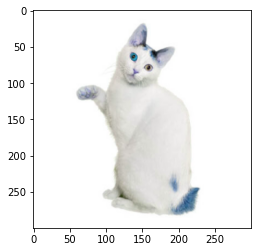

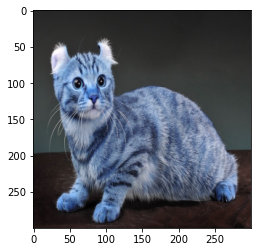

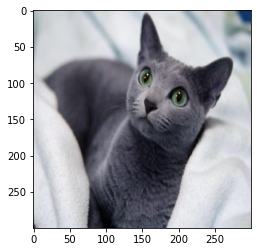

In [5]:
def draw_image_list(img_data_list):
    for img_data in img_data_list:
        plt.imshow(img_data)
        plt.pause(0.1)
    
draw_image_list(img_data_list)

### 6.5 Conversão do espaço de cor

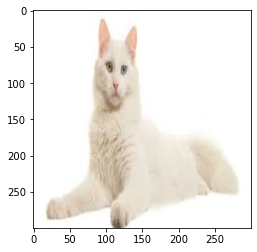

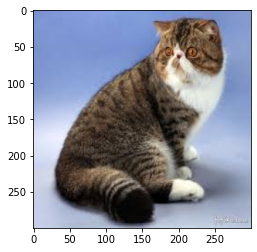

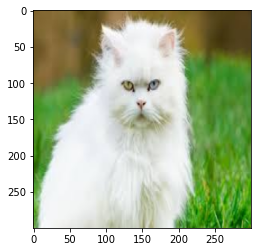

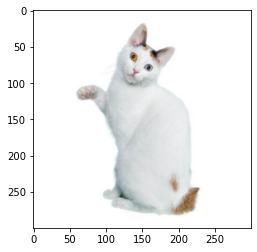

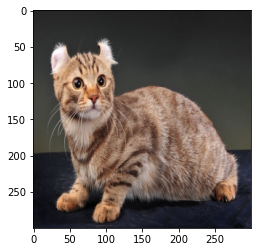

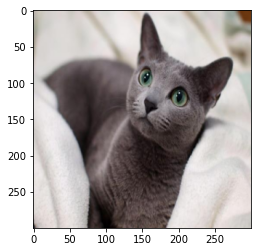

In [6]:
for i, img_data in enumerate(img_data_list): 
    img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
    img_data_list[i] = img_data
    
draw_image_list(img_data_list)

### 6.6 Aumento de dados

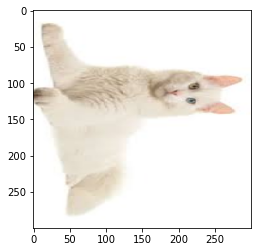

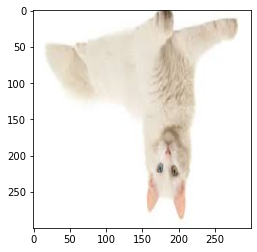

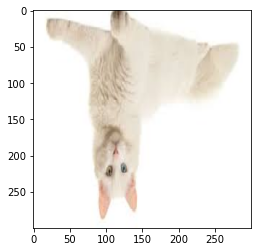

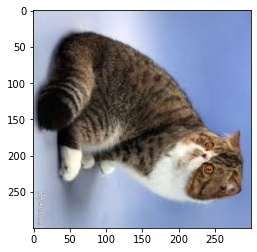

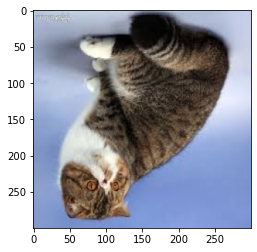

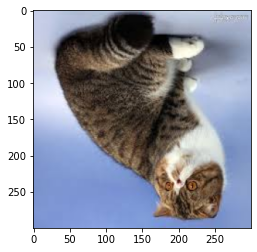

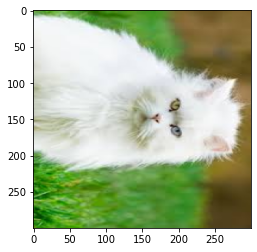

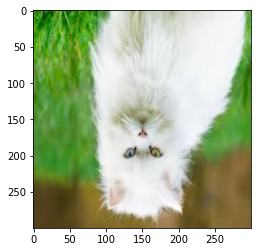

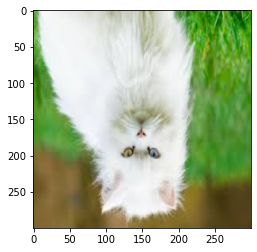

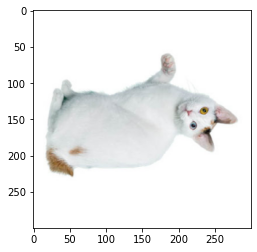

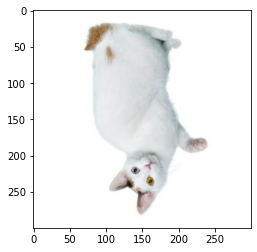

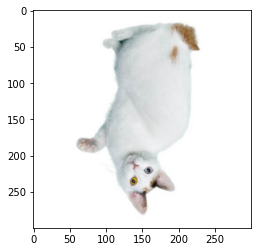

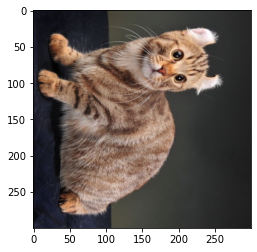

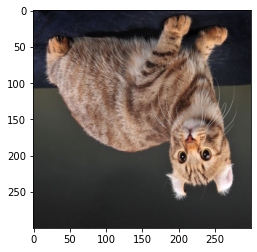

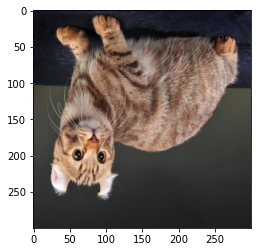

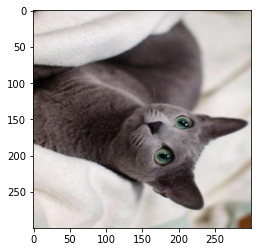

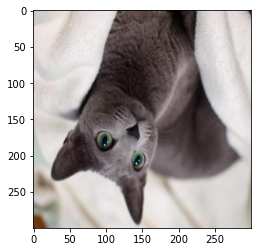

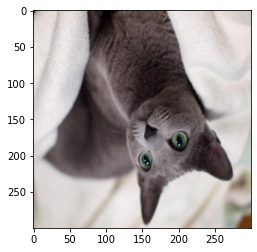

In [7]:
aux_list = []


for i, img_data in enumerate(img_data_list): 
    img_data_rot1 = img_rotate_90_clockwise = cv2.rotate(img_data, cv2.ROTATE_90_CLOCKWISE)
    img_data_rot2 = img_rotate_90_clockwise = cv2.rotate(img_data, cv2.ROTATE_180)
    img_data_flip = cv2.flip(img_data, 0) #=0: flip vertically | >0 flip horizontally | <0 flip vertically and horizontally
    aux_list.append(img_data_rot1)
    aux_list.append(img_data_rot2)
    plt.imshow(img_data_rot1)
    plt.pause(0.1)
    plt.imshow(img_data_rot2)
    plt.pause(0.1)
    plt.imshow(img_data_flip)
    plt.pause(0.1)
    
img_data_list = img_data_list + aux_list

### 6.7 convertendo uma lista de imagem para um tensor

In [8]:
img_data_tensor = np.asarray(img_data_list)

print(img_data_tensor.shape)

(18, 300, 300, 3)


In [9]:
print("Global")
print("Mínimo", img_data_tensor.min())
print("Máximo", img_data_tensor.max())
print("Média", img_data_tensor.mean())
print("Desvio padrão", img_data_tensor.std())

print("\nCanal vermelho")
print("Mínimo", img_data_tensor[:,:,:,0].min())
print("Máximo", img_data_tensor[:,:,:,0].max())
print("Média", img_data_tensor[:,:,:,0].mean())
print("Desvio padrão", img_data_tensor[:,:,:,0].std())

print("\nCanal verde")
print("Mínimo", img_data_tensor[:,:,:,1].min())
print("Máximo", img_data_tensor[:,:,:,1].max())
print("Média", img_data_tensor[:,:,:,1].mean())
print("Desvio padrão", img_data_tensor[:,:,:,1].std())

print("\nCanal azul")
print("Mínimo", img_data_tensor[:,:,:,2].min())
print("Máximo", img_data_tensor[:,:,:,2].max())
print("Média", img_data_tensor[:,:,:,2].mean())
print("Desvio padrão", img_data_tensor[:,:,:,2].std())

Global
Mínimo 0
Máximo 255
Média 166.95406358024692
Desvio padrão 81.34143933706603

Canal vermelho
Mínimo 0
Máximo 255
Média 169.45337407407408
Desvio padrão 78.47518989927157

Canal verde
Mínimo 0
Máximo 255
Média 168.9543351851852
Desvio padrão 78.70250441861253

Canal azul
Mínimo 0
Máximo 255
Média 162.45448148148148
Desvio padrão 86.40807688108033


### Normalização de imagem

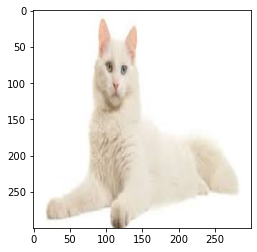

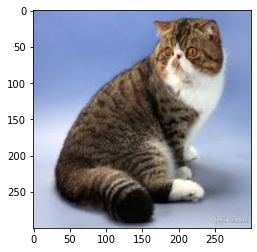

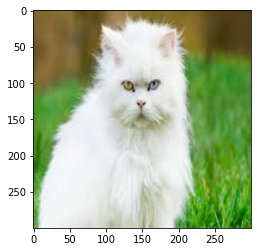

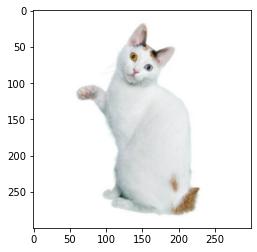

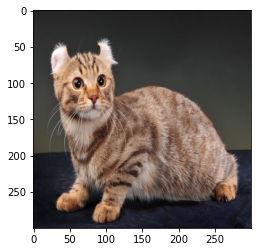

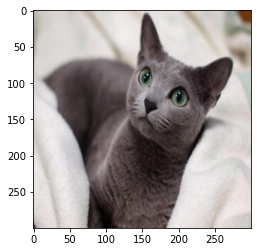

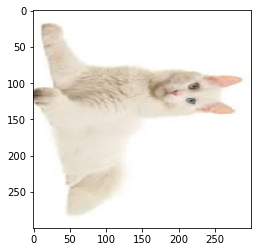

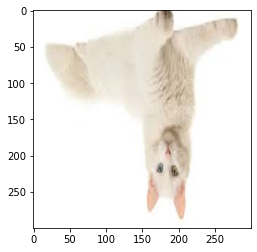

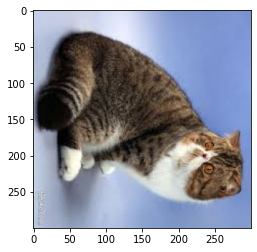

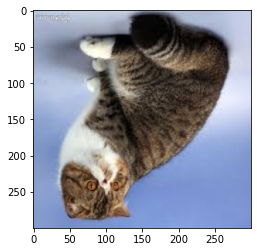

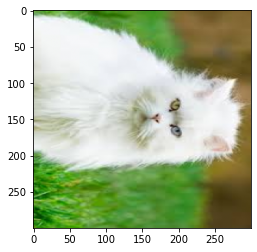

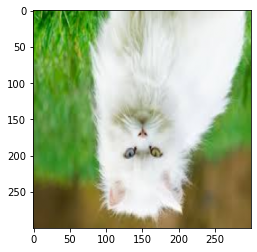

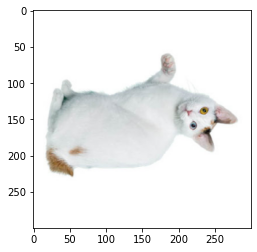

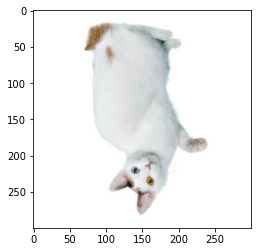

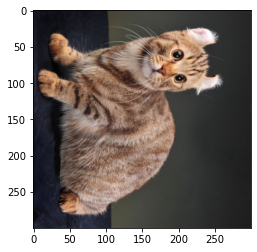

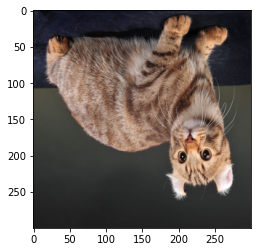

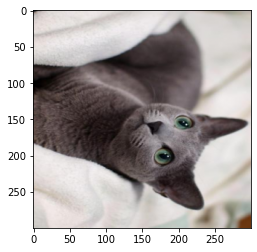

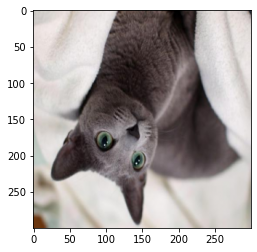

In [10]:
img_data_tensor = img_data_tensor/255 

qtdy_images = img_data_tensor.shape[0]
for i in range(qtdy_images):
    plt.imshow(img_data_tensor[i], vmin=0, vmax=1)
    plt.pause(0.1)